---
title: My post's title.  
date: 2019-09-01
---

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Paired')
import warnings
warnings.filterwarnings('ignore')

## Getting Stock Data with Yahoo Finance (Old way)

In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

## Updated (4/14/18): Getting Stock Data with Google Finance
Yahoo finance has changed the structure of its website and as a result the most popular Python packages for retrieving data have stopped functioning properly. Until this is resolved, the following piece of code will provide sufficient data to run the examples in this series of articles. Data is now taken from Google Finance and we are using the ETF "SPY" as proxy for S&P 500 on Google Finance.

Please not that if you use this set of data to run the example, you may be getting slightly different results.

In [4]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'SPY']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# Use pandas_reader.data.DataReader to load the desired data. As simple as that.
data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [5]:
data.head(9)

Attributes  Adj Close                            Close                         \
Symbols          AAPL       MSFT        SPY       AAPL       MSFT         SPY   
Date                                                                            
2009-12-31  26.061205  23.925440  90.707649  30.104286  30.480000  111.440002   
2010-01-04  26.466835  24.294369  92.246048  30.572857  30.950001  113.330002   
2010-01-05  26.512596  24.302216  92.490204  30.625713  30.959999  113.629997   
2010-01-06  26.090879  24.153070  92.555328  30.138571  30.770000  113.709999   
2010-01-07  26.042646  23.901886  92.946060  30.082857  30.450001  114.190002   
2010-01-08  26.215786  24.066734  93.255348  30.282858  30.660000  114.570000   
2010-01-11  25.984528  23.760603  93.385582  30.015715  30.270000  114.730003   
2010-01-12  25.688946  23.603607  92.514610  29.674286  30.070000  113.660004   
2010-01-13  26.051304  23.823395  93.296059  30.092857  30.350000  114.620003   

Attributes       High                               Low             \
Symbols          AAPL       MSFT         SPY       AAPL       MSFT   
Date                                                                 
2009-12-31  30.478571  30.990000  112.800003  30.080000  30.480000   
2010-01-04  30.642857  31.100000  113.389999  30.340000  30.590000   
2010-01-05  30.798571  31.100000  113.680000  30.464285  30.639999   
2010-01-06  30.747143  31.080000  113.989998  30.107143  30.520000   
2010-01-07  30.285715  30.700001  114.330002  29.864286  30.190001   
2010-01-08  30.285715  30.879999  114.620003  29.865715  30.240000   
2010-01-11  30.428572  30.760000  115.129997  29.778572  30.120001   
2010-01-12  29.967142  30.400000  114.209999  29.488571  29.910000   
2010-01-13  30.132856  30.520000  114.940002  29.157143  30.010000   

Attributes                   Open                              Volume  \
Symbols            SPY       AAPL       MSFT         SPY         AAPL   
Date                                                                    
2009-12-31  111.389999  30.447144  30.980000  112.769997   88102700.0   
2010-01-04  111.510002  30.490000  30.620001  112.370003  123432400.0   
2010-01-05  112.849998  30.657143  30.850000  113.260002  150476200.0   
2010-01-06  113.430000  30.625713  30.879999  113.519997  138040000.0   
2010-01-07  113.180000  30.250000  30.629999  113.500000  119282800.0   
2010-01-08  113.660004  30.042856  30.280001  113.889999  111902700.0   
2010-01-11  114.239998  30.400000  30.709999  115.080002  115557400.0   
2010-01-12  113.220001  29.884285  30.150000  113.970001  148614900.0   
2010-01-13  113.370003  29.695715  30.260000  113.949997  151473000.0   

Attributes                           
Symbols           MSFT          SPY  
Date                                 
2009-12-31  31929700.0   90637900.0  
2010-01-04  38409100.0  118944600.0  
2010-01-05  49749600.0  111579900.0  
2010-01-06  58182400.0  116074400.0  
2010-01-07  50559700.0  131091100.0  
2010-01-08  51197400.0  126402800.0  
2010-01-11  68754700.0  106375700.0  
2010-01-12  65912100.0  163333500.0  
2010-01-13  51863500.0  161822000.0

In [6]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

close.head(10)

Symbols,AAPL,MSFT,SPY
2010-01-01,NaN,NaN,NaN
2010-01-04,30.572857,30.950001,113.330002
2010-01-05,30.625713,30.959999,113.629997
2010-01-06,30.138571,30.770000,113.709999
2010-01-07,30.082857,30.450001,114.190002
2010-01-08,30.282858,30.660000,114.570000
2010-01-11,30.015715,30.270000,114.730003
2010-01-12,29.674286,30.070000,113.660004
2010-01-13,30.092857,30.350000,114.620003
2010-01-14,29.918571,30.959999,114.930000


In [7]:
all_weekdays

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=1826, freq='B')

In [8]:
close.describe()

Symbols,AAPL,MSFT,SPY
count,1825.000000,1825.000000,1825.000000
mean,79.413341,37.118608,164.676444
std,28.302258,10.814198,37.049112
min,27.435715,23.010000,102.199997
25%,55.544285,27.840000,131.320007
50%,78.438568,33.029999,165.220001
75%,103.120003,46.110001,201.990005
max,133.000000,63.619999,227.759995


In [9]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

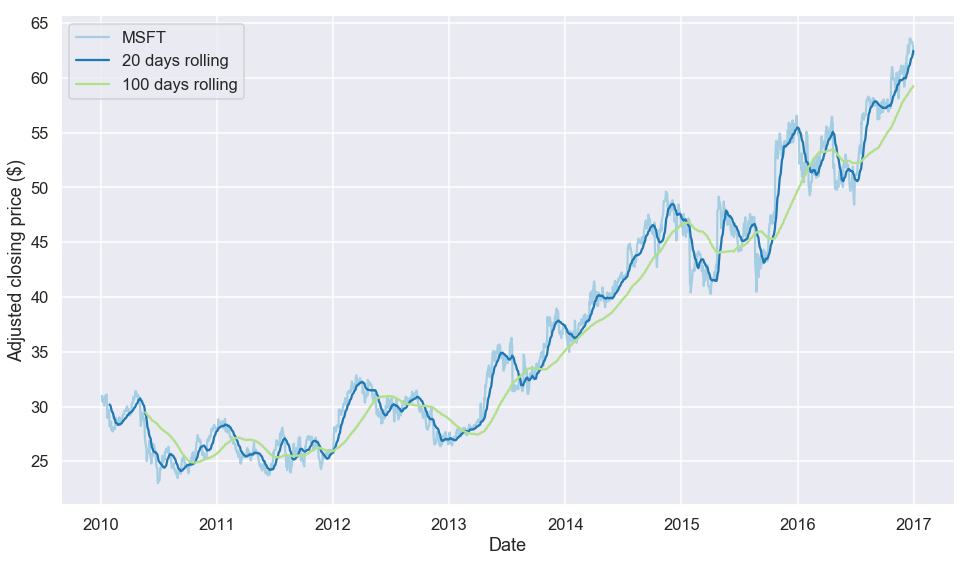

In [10]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
sns.despine()